# Monte Carlo Simulation of Stock Price Processes

## Table of Contents
* [1) Generate Geometric Brownian Motion (GBM)](#first-bullet)
    - [1a) GBM Non-Vectorized](#firsta-bullet)
    - [1b) GBM Vectorized](#firstb-bullet)
* [2) Generate Log-Normal (LN) Jump Processes](#second-bullet)
    - [2a) LN Jump Process Non-Vectorized](#seconda-bullet)
    - [2b) LN Jump Process Vectorized](#secondb-bullet)
    - [2c) Check we get GBM when Setting λ = 0.0](#secondc-bullet)
* [3) Generate Constant Elasticity of Variance (CEV) Processes](#third-bullet)
    - [3a) Check we get GBM, when Setting γ=2.0](#thirda-bullet)

## Setup

In [25]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import os

# local
from LSM import MonteCarloOptionPricing
from figs import plot_stock_price_simulations

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# Initialize instance from class
mc_option_pricing = MonteCarloOptionPricing(r=0.03, S0=90., K=100., T=2., σ=0.25, λ=0.4, dim=10_000, n=252, seed=15_001)

## 1) Generate Geometric Brownian Motion (GBM) <a class="anchor" id="first-bullet"></a>

### 1a) GBM Non-Vectorized <a class="anchor" id="firsta-bullet"></a>

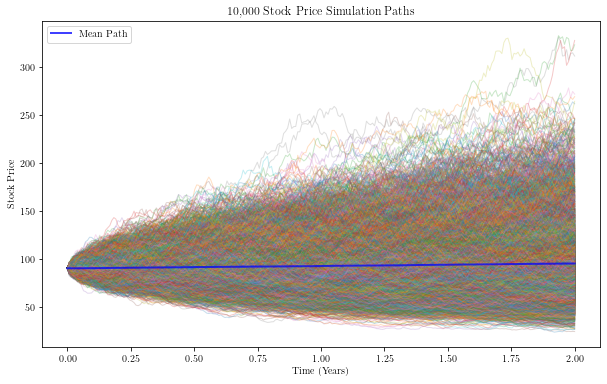

In [27]:
# Generate 'dim' no. of stock price process paths
simulated_paths = mc_option_pricing.GeometricBrownianMotion()

plot_stock_price_simulations(mc_option_pricing.T, mc_option_pricing.n, simulated_paths, mc_option_pricing.dim)

### 1b) GBM Vectorized <a class="anchor" id="firstb-bullet"></a>

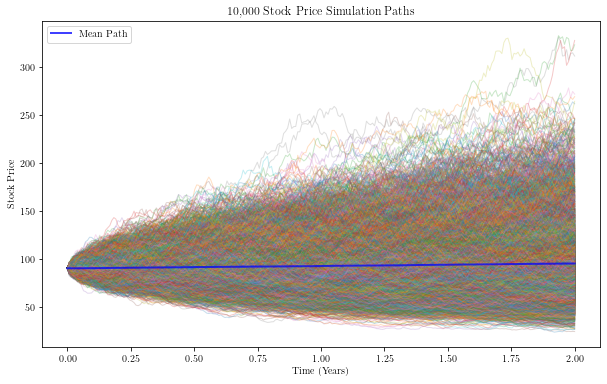

In [28]:
# Generate 'dim' no. of stock price process paths
simulated_paths = mc_option_pricing.GeometricBrownianMotion_vec()

# plot stock price process
plot_stock_price_simulations(mc_option_pricing.T, mc_option_pricing.n, simulated_paths, mc_option_pricing.dim)

## 2) Generate Log-Normal (LN) Jump Processes <a class="anchor" id="second-bullet"></a>

### 2a) LN Jump Processes Non-Vectorized <a class="anchor" id="seconda-bullet"></a>

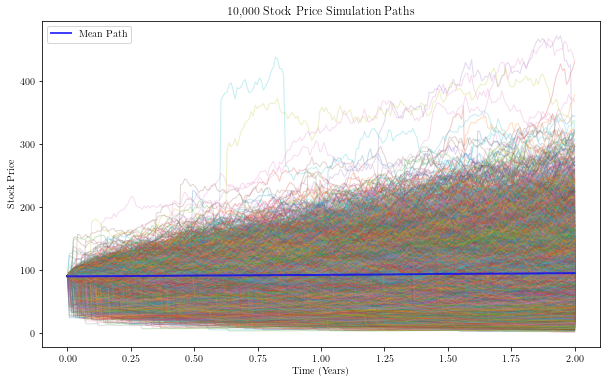

In [29]:
# Generate 'dim' no. of stock price process paths
simulated_paths = mc_option_pricing.MertonJumpDiffusion(α=-0.5, β=0.4)

# plot stock price process
plot_stock_price_simulations(mc_option_pricing.T, mc_option_pricing.n, simulated_paths, mc_option_pricing.dim)

### 2b) LN Jump Processes Vectorized <a class="anchor" id="secondb-bullet"></a>

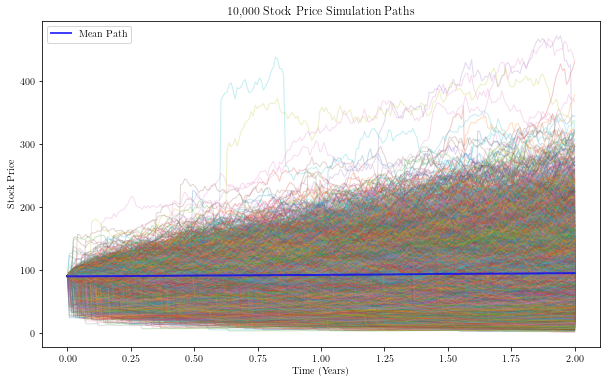

In [30]:
# Generate 'dim' no. of stock price process paths
simulated_paths = mc_option_pricing.MertonJumpDiffusion_vec(α=-0.5, β=0.4)

# plot stock price process
plot_stock_price_simulations(mc_option_pricing.T, mc_option_pricing.n, simulated_paths, mc_option_pricing.dim)

### 2c) Check we get GBM when Setting λ = 0.0  <a class="anchor" id="secondc-bullet"></a>

In [31]:
mc_option_pricing_test = MonteCarloOptionPricing(r=0.03, S0=90., K=100., T=2., σ=0.25, λ=0., dim=10_000, n=252, seed=15_001)

**Non-vectorized**:

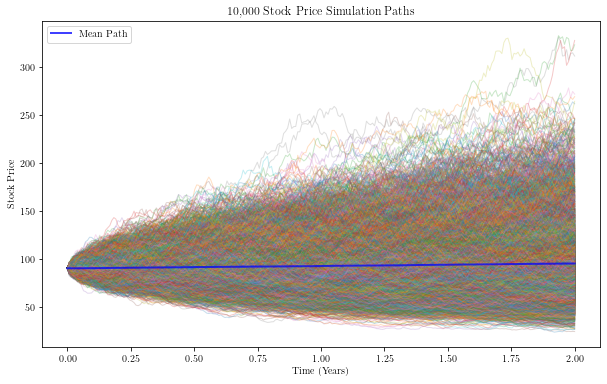

In [32]:
# Generate 'dim' no. of stock price process paths
simulated_paths_test1 = mc_option_pricing_test.MertonJumpDiffusion(α=-0.5, β=0.4)

# plot stock price process
plot_stock_price_simulations(mc_option_pricing_test.T, mc_option_pricing_test.n, simulated_paths_test1, mc_option_pricing_test.dim)

**Vectorized**:

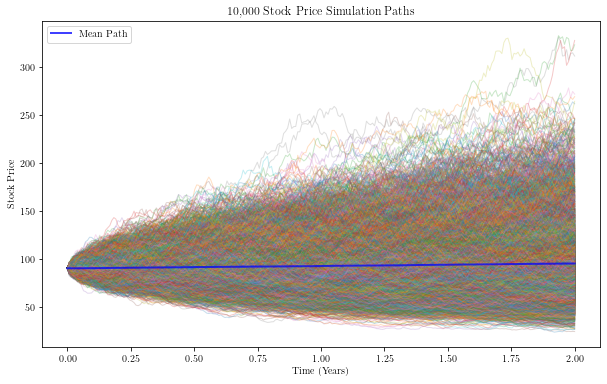

In [33]:
# Generate 'dim' no. of stock price process paths
simulated_paths_test2 = mc_option_pricing_test.MertonJumpDiffusion_vec(α=-0.5, β=0.4)

# plot stock price process
plot_stock_price_simulations(mc_option_pricing_test.T, mc_option_pricing_test.n, simulated_paths_test2, mc_option_pricing_test.dim)

## 3) Generate Constant Elasticity of Variance (CEV) Processes <a class="anchor" id="third-bullet"></a>

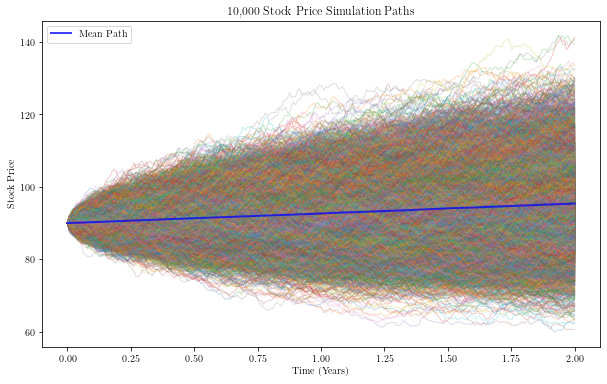

In [34]:
# Generate 'dim' no. of stock price process paths
simulated_paths = mc_option_pricing.CEV(γ=1.5)

# plot stock price process
plot_stock_price_simulations(mc_option_pricing.T, mc_option_pricing.n, simulated_paths, mc_option_pricing.dim)

### 3a) Check we get GBM, when Setting γ=2.0  <a class="anchor" id="thirda-bullet"></a>

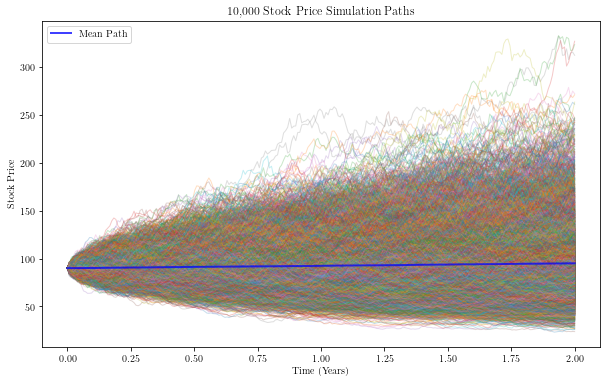

In [35]:
# Generate 'dim' no. of stock price process paths
simulated_paths_test3 = mc_option_pricing_test.CEV(γ=2.0)

# plot stock price process
plot_stock_price_simulations(mc_option_pricing_test.T, mc_option_pricing_test.n, simulated_paths_test3, mc_option_pricing_test.dim)